<a href="https://colab.research.google.com/github/mowlu/mowlu.github.io/blob/main/Catch_them_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Catch them all - Investigating Pokemon Data

## By Merle Uhl

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pokemon = pd.read_csv('https://sds-aau.github.io/SDS-master/00_data/pokemon.csv')

### EDA & Unsupervised ML


####1. Task

In [3]:
pokemon.head()

,Number,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Number          800 non-null    int64 
 1   Name            800 non-null    object
 2   Type1           800 non-null    object
 3   Type2           414 non-null    object
 4   Total           800 non-null    int64 
 5   HitPoints       800 non-null    int64 
 6   Attack          800 non-null    int64 
 7   Defense         800 non-null    int64 
 8   SpecialAttack   800 non-null    int64 
 9   SpecialDefense  800 non-null    int64 
 10  Speed           800 non-null    int64 
 11  Generation      800 non-null    int64 
 12  Legendary       800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
# additional since already visible in info()
# pokemon.dtypes

For the object columns I use value_counts() in order to get an overview of the existing values. For the Name column this does not make a lot of sense, since every Pokemon Name exists only once. 

In [6]:
pokemon['Name'].value_counts()

Pawniard                  1
PumpkabooLarge Size       1
Oshawott                  1
Doduo                     1
Weezing                   1
                         ..
Seaking                   1
Tynamo                    1
ThundurusTherian Forme    1
Geodude                   1
Blitzle                   1
Name: Name, Length: 800, dtype: int64

In [7]:
pokemon['Type1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type1, dtype: int64

In [8]:
pokemon['Type2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Ice         14
Ghost       14
Water       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type2, dtype: int64

For the numerical columns I use describe() to capture the variation.

In [9]:
pokemon.describe()

,Number,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


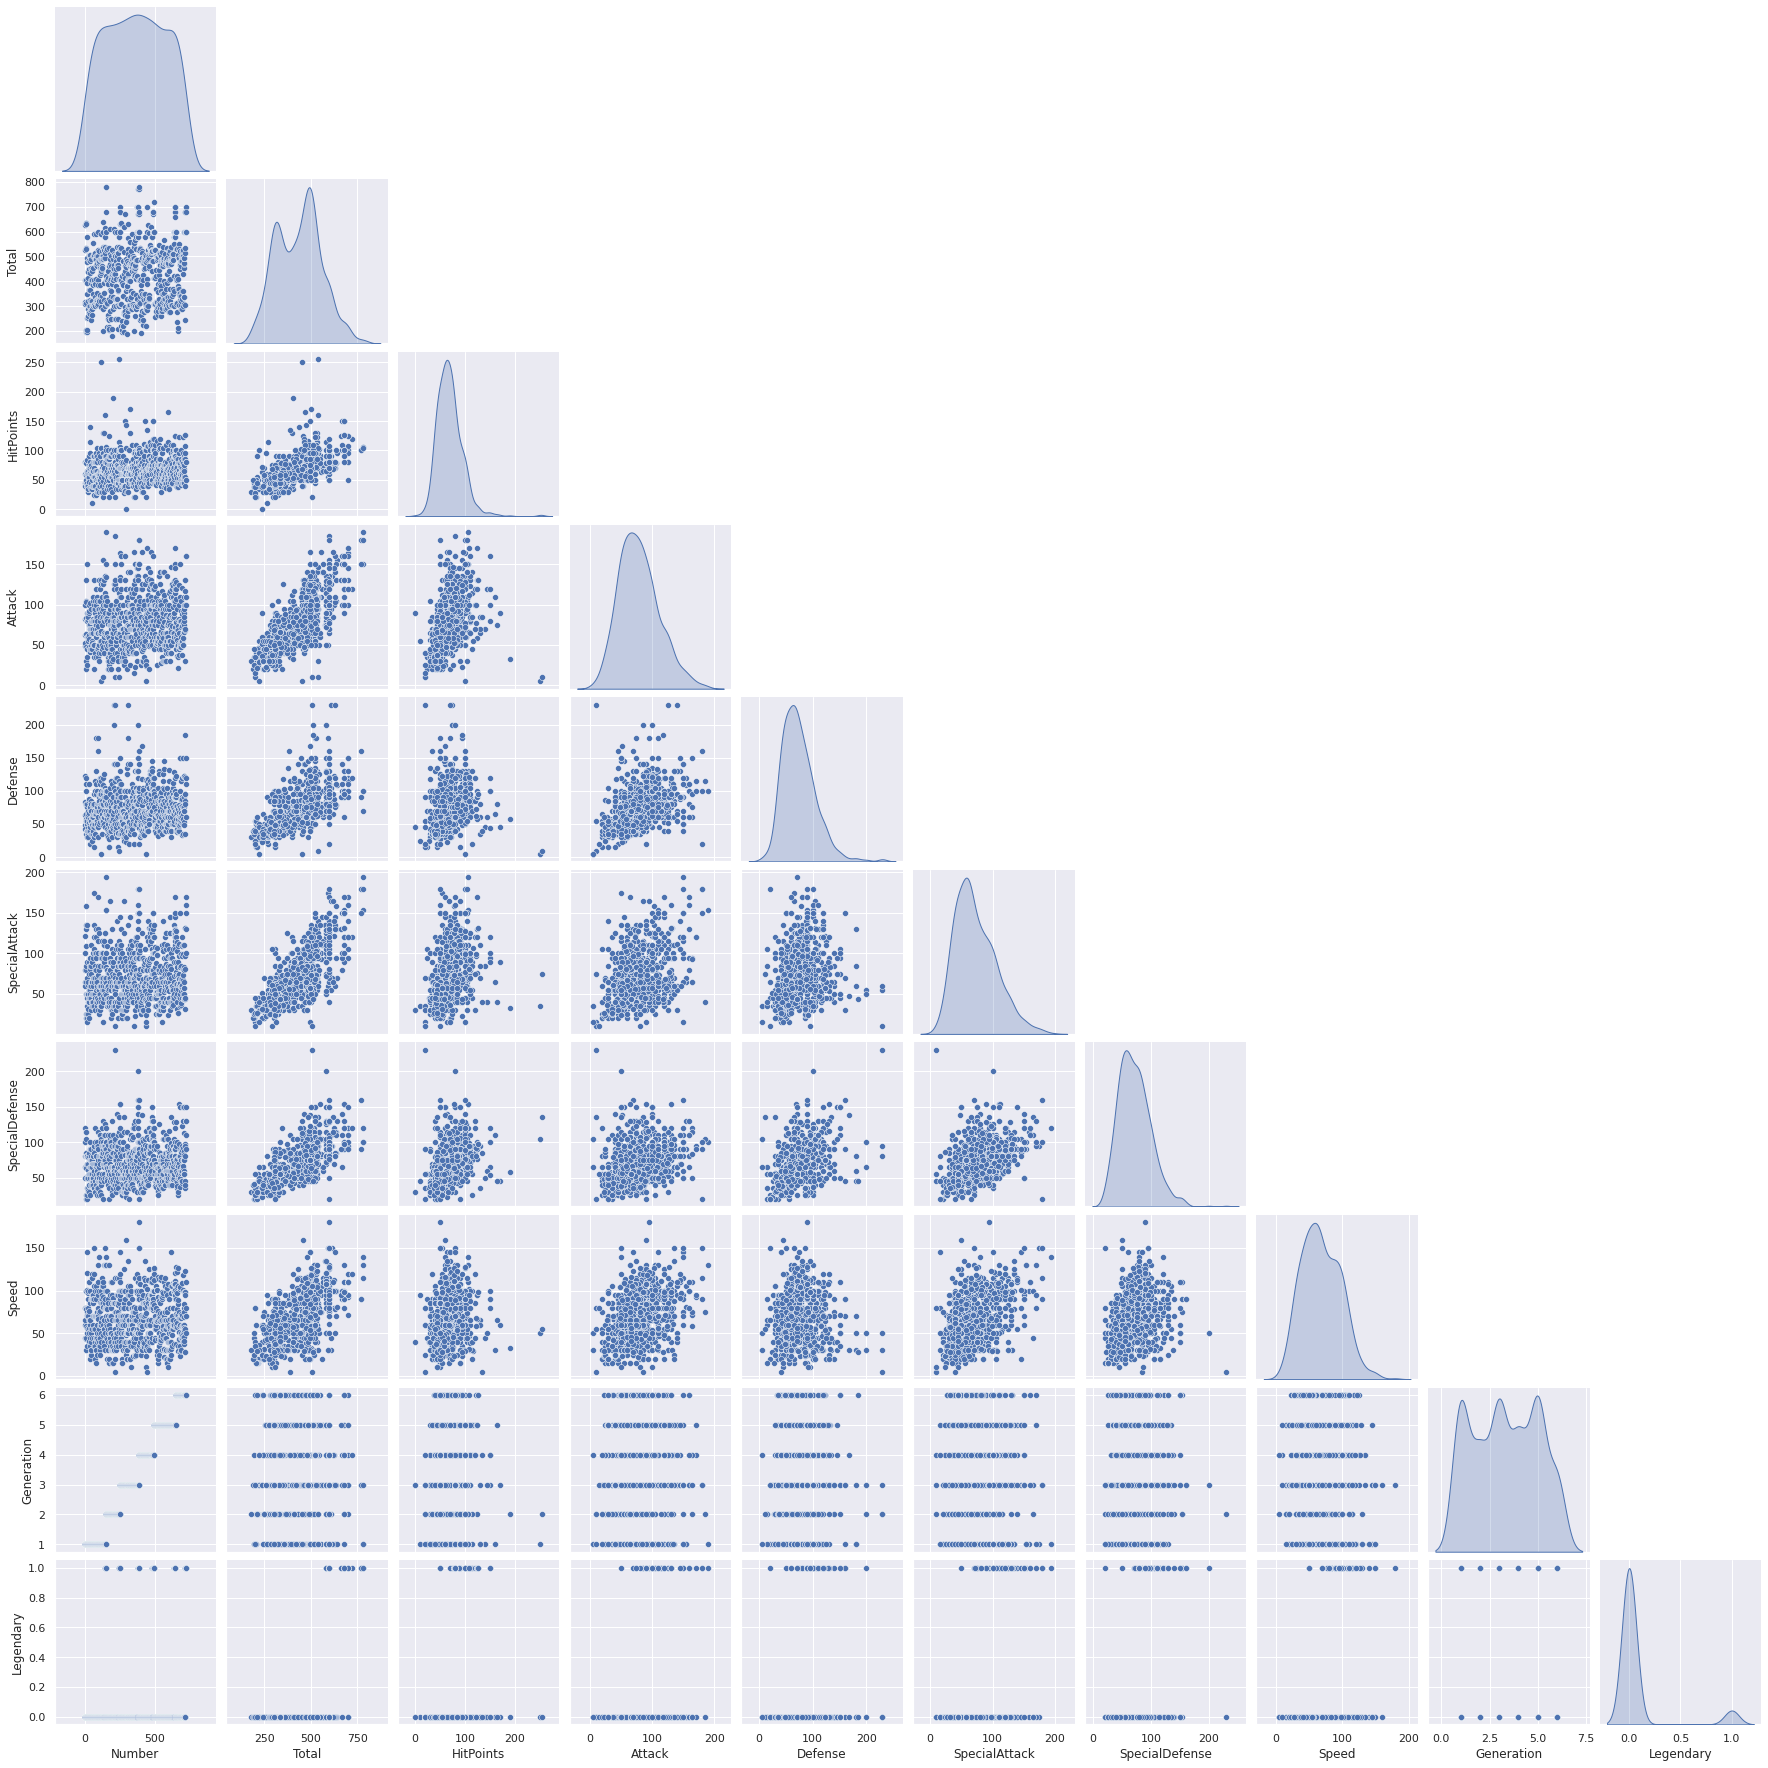

In [10]:
sns.pairplot(pokemon, corner=True, diag_kind='kde')

####2. Task

In [11]:
# importing the necessary Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scale all numerical variables into a new matrix
pokemon_scaled = scaler.fit_transform(pokemon.loc[:,'Total':'Generation'])

In [12]:
# import PCA
from sklearn.decomposition import PCA
# 4 components in PCA
pca = PCA(n_components=4)
# reduce dimensinos of data with PCA
pokemon_pca = pca.fit_transform(pokemon_scaled)
pokemon_pca.shape

(800, 4)

In [13]:
pca.components_

array([[ 0.51853234,  0.32945198,  0.37801677,  0.31314747,  0.38980094,
         0.37971841,  0.29027307,  0.03518934],
       [-0.01420186,  0.10439537,  0.00128082,  0.57105747, -0.28352599,
         0.20315863, -0.63985901,  0.36292102],
       [ 0.01636274, -0.06341564, -0.04954756,  0.28499689, -0.09862095,
         0.17005868, -0.17901433, -0.91724607],
       [-0.01050926, -0.42816383, -0.60736064,  0.03352762,  0.32455031,
         0.56555842,  0.06817537,  0.12929477]])

In [14]:
pokemon_pca

array([[-1.88828896, -0.51950497,  1.27161139,  0.49873032],
       [-0.49265201, -0.56235125,  1.30840805,  0.50018453],
       [ 1.42997255, -0.59541581,  1.36613629,  0.4532759 ],
       ...,
       [ 2.86117152,  0.07428026, -1.54481267,  1.36987446],
       [ 4.12822037, -0.32694247, -1.73222328,  0.64861315],
       [ 2.67954563,  1.05494327, -1.18038089,  0.42251841]])

In [15]:
print(pca.explained_variance_)

[3.71748082 1.11154834 0.98815251 0.77588929]


Below is the proportion of the variance explained by each component.

In [16]:
print(pca.explained_variance_ratio_)

[0.46410425 0.13876986 0.12336467 0.09686493]


In the following, you can find the cumulative explained variance. The four components explain overall about 82% of the variance in the dependent variable.

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46410425, 0.60287411, 0.72623877, 0.8231037 ])

Text(0, 0.5, 'cumulative explained variance')

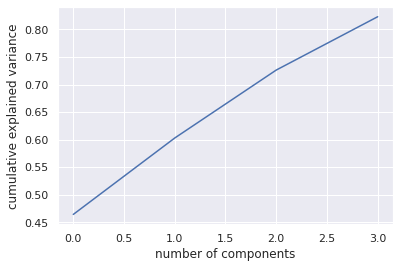

In [18]:
# additional code to visualize the cumulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

####3. Task

In [19]:
# import UMAP
import umap
# 4 components also in UMAP
reducer = umap.UMAP(n_components=4)
# reduce dimensions of data with UMAP
pokemon_umap = reducer.fit_transform(pokemon_scaled)
pokemon_umap.shape

ModuleNotFoundError: ignored

In [ ]:
pokemon_umap

The magnitude of the values of the PCA and UMAP objects differs somehow. However, later, when visualising the results, it seems that UMAP does a better job in separating the different clusters. While for PCA the data points between clusters are still very close, for UMAP it is easier to distinguish the different clusters as their respective data points have more distance to the other clusters.

####4. Task

In [ ]:
# import KMeans for clustering
from sklearn.cluster import KMeans

Trying out the number of clusters yields a good result for three clusters. 

In [ ]:
clusterer = KMeans(n_clusters=3)
clusterer.fit(pokemon_scaled)

####5. Task

In [ ]:
sns.scatterplot(pokemon_scaled[:,0], pokemon_scaled[:,1], hue = clusterer.labels_ )

####6. Task

In [ ]:
sns.scatterplot(pokemon_scaled[:,0], pokemon_scaled[:,1], hue = pokemon['Type1']).legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


The types do not seem to coincide with the clusters. The colours are spread out over the whole chart and there seems no area where they cluster. When comparing it with the chart where three clusters are separated by colours, there appears to be no clustering by type.

#### 7. Task

In [ ]:
sns.scatterplot(pokemon_pca[:,0], pokemon_pca[:,1], hue = clusterer.labels_)

In [ ]:
# visualization with the dimensionality reduction through UMAP 
sns.scatterplot(pokemon_umap[:,0], pokemon_umap[:,1], hue = clusterer.labels_)

####8. Task

In [ ]:
sns.scatterplot(pokemon_pca[:,0], pokemon_pca[:,1], hue = pokemon['Type1']).legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Although placed a little different on the coordinate system, the overall structure of the data points is very similar to the one without dimensionality reduction. It is also not possible to differentiate different types of pokemon depending on the position of the points on the plot.

In [ ]:
sns.scatterplot(pokemon_umap[:,0], pokemon_umap[:,1], pokemon['Type1']).legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Also dimension reduction with UMAP does not give better results. 

### Supervised ML


####1. Task

In [ ]:
# to investigate again the structure of the data
pokemon.head()

,Number,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


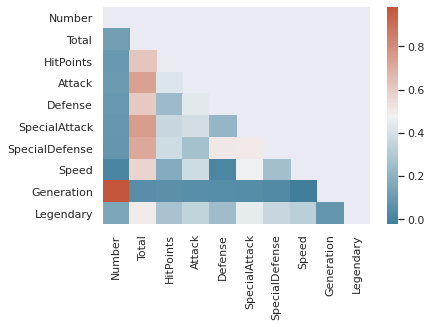

In [ ]:
# investigate correlation of the variables
corr = pokemon.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,mask=mask, cmap=cmap)

In [ ]:
scaler = StandardScaler()
# make data that will be preprocessed
pokemon_prep = pokemon
# scale all numerical variables
pokemon_prep.loc[:,'Total':'Generation'] = scaler.fit_transform(pokemon_prep.loc[:,'Total':'Generation'])

In [ ]:
# make dummies for the type variables
for col in pokemon_prep.loc[:,'Type1':'Type2']:
    dummies = pd.get_dummies(pokemon_prep[col], prefix=col, dummy_na=True)
    pokemon_prep = pd.concat([pokemon_prep, dummies], axis=1)
    pokemon_prep.drop(col, axis=1, inplace=True)

In [ ]:
pokemon_prep.head()

,Number,Name,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary,Type1_Bug,Type1_Dark,Type1_Dragon,Type1_Electric,Type1_Fairy,Type1_Fighting,Type1_Fire,Type1_Flying,Type1_Ghost,Type1_Grass,Type1_Ground,Type1_Ice,Type1_Normal,Type1_Poison,Type1_Psychic,Type1_Rock,Type1_Steel,Type1_Water,Type1_nan,Type2_Bug,Type2_Dark,Type2_Dragon,Type2_Electric,Type2_Fairy,Type2_Fighting,Type2_Fire,Type2_Flying,Type2_Ghost,Type2_Grass,Type2_Ground,Type2_Ice,Type2_Normal,Type2_Poison,Type2_Psychic,Type2_Rock,Type2_Steel,Type2_Water,Type2_nan
0,1,Bulbasaur,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,Ivysaur,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,Venusaur,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,3,VenusaurMega Venusaur,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,Charmander,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# remove number column that does not contain valuable information
pokemon_prep = pokemon_prep.loc[:,'Total':'Type2_nan'].drop(columns='Legendary')
# place Legendary column at the beginning to easier slice into training and test data
legendary_list = pokemon['Legendary'].to_list()
pokemon_prep.insert(0, 'Legendary', legendary_list)
pokemon_prep.head()

,Legendary,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Type1_Bug,Type1_Dark,Type1_Dragon,Type1_Electric,Type1_Fairy,Type1_Fighting,Type1_Fire,Type1_Flying,Type1_Ghost,Type1_Grass,Type1_Ground,Type1_Ice,Type1_Normal,Type1_Poison,Type1_Psychic,Type1_Rock,Type1_Steel,Type1_Water,Type1_nan,Type2_Bug,Type2_Dark,Type2_Dragon,Type2_Electric,Type2_Fairy,Type2_Fighting,Type2_Fire,Type2_Flying,Type2_Ghost,Type2_Grass,Type2_Ground,Type2_Ice,Type2_Normal,Type2_Poison,Type2_Psychic,Type2_Rock,Type2_Steel,Type2_Water,Type2_nan
0,False,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,False,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,False,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,False,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,False,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


####2. Task

In [ ]:
# import package for splitting data into training and test data
from sklearn.model_selection import train_test_split

In [ ]:
# make test data 25% of available data
X_train, X_test, y_train, y_test = train_test_split(pokemon_prep.loc[:,'Total':'Type2_nan'],pokemon_prep.loc[:,'Legendary'], test_size=0.25)

####3. Task

In [ ]:
# preparation to do 10-fold crossvalidation
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import make_scorer 
#from sklearn.metrics import mean_squared_error 
#from sklearn.metrics import r2_score

#scorer = make_scorer(mean_squared_error)

The crossvalidation itself happens within the model fitting of the specific models in the following. 

####4. Task
Logistic Regression

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model_logit = LogisticRegression()
model_logit.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
parameters_logit = {"C":np.logspace(0,4,10), "penalty":["l2", "l2"]}
grid_obj = GridSearchCV(model_logit, parameters_logit, cv=10)

In [ ]:
grid_logit = grid_obj.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
best_logit = grid_logit.best_estimator_

In [ ]:
# to explicitly give the best parameters
print('Best Penalty:', grid_logit.best_estimator_.get_params()['penalty'])
print('Best C:', grid_logit.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


Decision Tree

In [ ]:
# import tree
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
model_tree.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

In [ ]:
parameters_tree = {"max_depth":max_depths, "min_samples_split":min_samples_splits, "min_samples_leaf":min_samples_leafs}
grid_obj = GridSearchCV(model_tree, parameters_tree, cv=10)

In [ ]:
grid_tree = grid_obj.fit(X_train,y_train)

In [ ]:
best_tree = grid_tree.best_estimator_

In [ ]:
print('Best Depth:', grid_tree.best_estimator_.get_params()['max_depth'])
print('Best Samples Split:', grid_tree.best_estimator_.get_params()['min_samples_split'])
print('Best Samples Leaf:', grid_tree.best_estimator_.get_params()['min_samples_leaf'])

Support Vector Machine

In [ ]:
# import support vector machine
from sklearn.svm import SVC
model_svc = SVC()
model_svc.get_params().keys()

In [ ]:
parameters_svc = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_obj = GridSearchCV(model_svc, parameters_svc, refit=True,verbose=2)

In [ ]:
grid_svc = grid_obj.fit(X_train,y_train)

In [ ]:
best_svc = grid_svc.best_estimator_

In [ ]:
print('Best C:', grid_svc.best_estimator_.get_params()['C'])
print('Best gamma:', grid_svc.best_estimator_.get_params()['gamma'])
print('Best kernel:', grid_svc.best_estimator_.get_params()['kernel'])

####5. Task

In [ ]:
y_logit = best_logit.predict(X_test)

In [ ]:
y_tree = best_tree.predict(X_test)

In [ ]:
y_svc = best_svc.predict(X_test)

####6. Task

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

Logistic Regresison

In [ ]:
cm_log = confusion_matrix(y_test, y_logit)
cm_log

In [ ]:
plot_confusion_matrix(conf_mat=cm_log,
                                show_absolute=True,
                                show_normed=True)

In [ ]:
print(classification_report(y_test, y_logit))

In [ ]:
print('Model Logit' + ' ' + str(best_logit.score(X_test, y_test)))

In [ ]:
# Area Under Curve as additional model evaluation technique
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_logit)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

Decision Tree

In [ ]:
cm_tree = confusion_matrix(y_test, y_tree)
cm_tree

In [ ]:
plot_confusion_matrix(conf_mat=cm_tree,
                                show_absolute=True,
                                show_normed=True)

In [ ]:
print(classification_report(y_test, y_tree))

In [ ]:
print('Model Tree' + ' ' + str(best_tree.score(X_test, y_test)))

In [ ]:
# Area Under Curve as additional model evaluation technique
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_tree)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

Support Vector Machine

In [ ]:
cm_svc = confusion_matrix(y_test, y_svc)
cm_svc

In [ ]:
plot_confusion_matrix(conf_mat=cm_svc,
                                show_absolute=True,
                                show_normed=True)

In [ ]:
print(classification_report(y_test, y_svc))

In [ ]:
print('Model SVM' + ' ' + str(best_svc.score(X_test, y_test)))

In [ ]:
# Area Under Curve as additional model evaluation technique
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_svc)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

######The confusion matrix gives a good visual overview of how the models that were trained on training data perform on the test data.
#####The score for each model gives its mean accuracy. This allows to asses the number of predictions a model got right. This, however, does not give any information on whether you are working with an imbalanced data set. 
######Information on this can be obtained with a classification report. If the data is imbalanced, 99% accuracy can be meaningless as it might just reflect that one class is highly underrepresented. For the here used data it becomes obvious that for the logit and SVM model only 53% and respectively 42% of all legendary pokemon were correctly identified. For the tree model, the prediction to be not legendary is only correct in 50% of the cases. 
#####Finally, the AUC-ROC Curve is another way to assess the performance of a model. It gives information on how good a model is able to distinguish between classes. A higher AUC score stands for higher accuracy of the model. In this analysis, the Decision Tree has with 0.93 the highest values in this regards.